# Supervised Learning

<img src="media/supervised.png" width="600">

# Supervised Learning 

Building a model or algorithm to predict or estimate a certain target or output variable from some input variables.

<img src="media/cat1.jpg" width="700">

Predicting and estimating, in this context, refer to similar things. **Predicting** is generally used when it comes to variables that are not observable now, but in the future, and **estimate** when we are interested in current variables that we cannot observe now because of high costs or because of the nature of the phenomenon.

For example, to identify customers at high risk of credit card default, we use historical data of customers who have paid and have not paid. With this data we train an algorithm to detect clients with high risk of default in advance.

We usually divide supervised learning problems into two types, depending on the output variables:

* **Regression problems:** when the output is a numerical variable. The example of income estimation is a regression problem
* **Classification problems:** when the output is a categorical variable. The example of handwritten digit 

<img src="media/Classification-vs-Regression.png" width="700">

## 1. Regression Problems

Prediction of numeric variables

### Data Generating Process

To understand what we are trying to do, we will think in terms of **probabilistic models** that generate the data. The idea is that these represent the processes that generate the data or observations.

If $Y$ is a reponse we want to predict, and $X$ is an entry we want to use to predict $Y$, we consider that the random variables $Y$ and $X$ are related in the following way:

$$Y=f(X)+\epsilon$$

Where $\epsilon$ is a random error independent from $X$, and that has an expected value $E(\epsilon)=0$.

* Where $f$ expresses the sistematic relation between $Y$ and $X$: for every possible value of $X$, the contribution of $X$ to $Y$ is $f(X)$.
* But $X$ **is not determining** $Y$. That's why we add a random error $\epsilon$ with mean of zero (if the mean is not equal to zero, then we could add a constant to $f$), that doesn't contain information about $X$ (independent from $X$).
* And $\epsilon$ represents, for example, the efect of variables that we haven't measured or random processes that determine the response.

### Example

Simulate this to understand it better

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

Let's suppose that $X$ is the amount of study of any person and $Y$ is the monthly payment received. These are the years of study of 8 people

In [2]:
x = [1,7,10,0,0,5,9,13,2,4,17,18,1,2]

Now we say that the relation of $Y$ from $X$ is given by $Y = f(x)+\epsilon$, an $f$ function that we don't know

In [3]:
def f(x):
    if x<10:
        return 1000*x**0.5
    else:
        return 1000*10**0.5

On the real life, income is not only determined by the amount of years of study. Let's suppose there are other aditional variables that randomly affect $f(X)$. So the values we observe of $Y$ are given by $Y=f(X)+\epsilon$.

In [4]:
x_p = list(range(0,20))
y_p = list(map(f,x_p)) #map applies the function to the list

In [5]:
data_p = pd.DataFrame({'x_p':x_p,'y_p':y_p})
data_p.head()

,x_p,y_p
0,0,0.000000
1,1,1000.000000
2,2,1414.213562
3,3,1732.050808
4,4,2000.000000


In [7]:
error = np.random.normal(0,200,len(data_p))
error

array([  94.16188706, -163.77687466, -301.09150036,    1.27434962,
        117.19284911,  -45.624615  ,  -29.39186458,  -83.48846507,
       -151.92215308, -295.82255695,   80.26377114,   29.69389354,
        146.50508562, -110.13946671, -119.8343667 ,  486.2093653 ,
        396.17545809,   40.61582334, -191.59274565,  436.89412474])

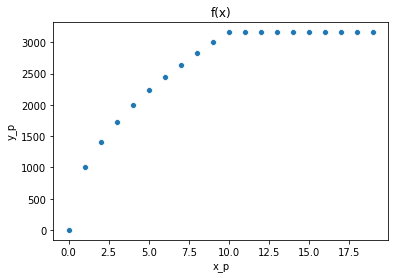

In [8]:
data_p['y']=data_p['y_p']+error

ax = sns.scatterplot(x="x_p", y="y_p", data=data_p).set_title('f(x)')

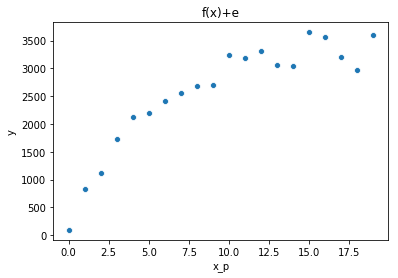

In [9]:
ax = sns.scatterplot(x="x_p", y="y", data=data_p).set_title('f(x)+e')

In machine learning problems we never know that function $f(x)$, despite we can know some of its properties (for example that it is continuous, has small variations...). What we have is data that could have been different for an other group of people.

In [10]:
error2 = np.random.normal(0,200,len(data_p))
error2

array([-351.91998614, -136.06678924,  -23.01284216,   44.78141593,
       -138.22520928,  147.45963323,  206.99393805, -272.78701513,
        -13.26468662,   44.16852662, -121.26003042,  233.56135656,
       -143.13077372,   12.42902399,  248.24230028,  -68.4871612 ,
       -252.18676087, -399.8384731 ,   46.69702701,  116.2819444 ])

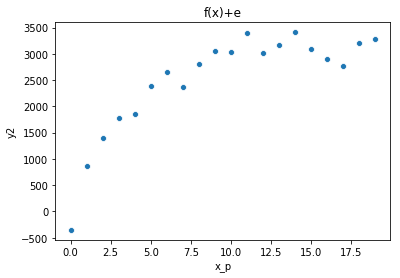

In [11]:
data_p['y2']=data_p['y_p']+error2

ax = sns.scatterplot(x="x_p", y="y2", data=data_p).set_title('f(x)+e')

## Conclusion 1

Under the model we just described $Y=f(X)+\epsilon$, **learning from data** means trying to obtain or estimate the shape of the function $f$ that we don't know. $f$ represents the sistematic relation between $Y$ and $X$.


How well can we estimate that $f$ that we don't know, with the available data? What does it mean to estimate well? Even this simple example shows the difficulties we are going to face, and the importance of carefully determining how much information we have, and how good our predictions can be.

## Predictions

So, the ultimate goal is to produce an estimation of $f$ that can help us make some predictions.

If we define $\hat{f}$ an estimation of $f$ built from the data, we can make predictions applying $\hat{f}$ to values of $X$. So we define the prediction of $Y$ as $\hat{Y}$, and $$\hat{Y}=\hat{f}(X)$$ 

The residual error from the prediction is given by the difference of the observed value and the prediction: $$Y-\hat{Y}$$

We could make a linear regression with the data from the previous example to exemplify this:

In [12]:
from sklearn import linear_model

In [94]:
regr = linear_model.LinearRegression()

x = pd.DataFrame(data_p.x_p)
y = pd.DataFrame(data_p.y)

regr.fit(x,y)

y_pred = regr.predict(x)


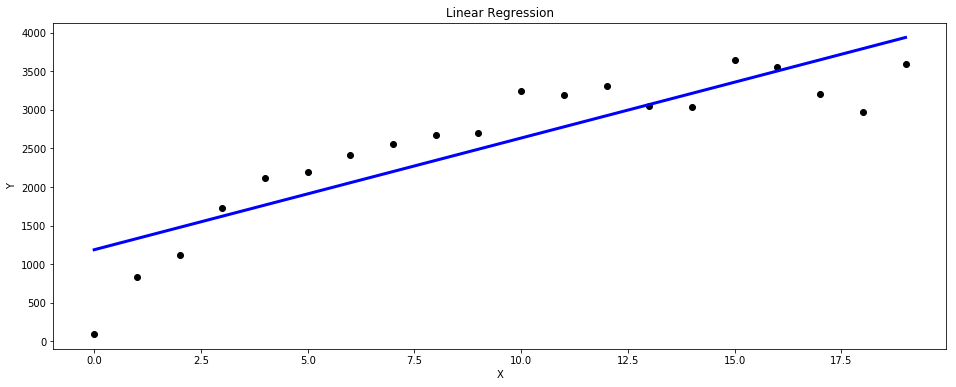

In [95]:
plt.figure(figsize=(16,6))
plt.scatter(x,y,  color='black')
plt.plot(x,y_pred, color='blue', linewidth=3)

plt.xlabel(xlabel='X')
plt.ylabel(ylabel='Y')
plt.title(label='Linear Regression')
plt.show()

In this case $\hat{f}$ is a line, and we can use it to make predictions. For example, if we have an observation with $x_{0}=8$ years of study, our income prediction $\hat{y}=\hat{f}(8)$ would be:

In [96]:
pred1 = float(regr.predict([[8]]))
pred1

2345.913932960588

If we compare this prediction with the real observation at $x_{0}=8$, the real income would be $y_{0}=2676.5$

In [97]:
real1 = float(data_p.loc[data_p['x_p']==8]['y'])
real1

2676.504971667631

This means the error would be of:

In [98]:
real1 - pred1

330.59103870704257

Learning looks for **reducing this errors to zero**

## The Supervised Learning Task

The missing element to define the supervised learning task is to quantify what it means to approximate well
$f$, or have accurate predictions. For this we define a **loss function**: $$L(Y,\hat{f}(X))$$

that tells how much it costs to make the prediction $\hat{f}$ when the real value is $Y$ and the input values are $X$. A convenient option for regression models is the **quadratic loss**: $$L(Y,\hat{f}(X))=(Y-\hat{f}(X))^{2}$$
This is a random number, in a way that in some cases the error can be bigger or smaller. Usually we look for an $\hat{f}$, in a way that the average error decreases: $$Err = E(Y-\hat{f}(X))^{2}$$

### Notes

* This expected value is about the population for which we want to make predictions. It is a theoretical amount, we cannot calculate it with any data set.
* Under mean square error and assuming the additive model $Y = f(x)+\epsilon$,the best predictor of $Y$ is $f(x) = E[Y|X=x]$. In other words: we want to approximate as better as possible the conditional expected value.

Now we have all the elements to precisely define supervised learning.

Let's consider a data generaating process $(X,Y)$.

In the first place, we have Data from which we are going to learn. Suppose we  have a labeled data set (generated through $(X,Y)$) $$\ell = \{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),...,(x^{(n)},y^{(n)})\}$$
that we call **training set**. Note that we use lowercase letters to describe particular observations of $(X,Y)$.

A **learning algorithm** (learning from data) is a rule that gives a function $\hat{f}$ to every training set $\ell$: $$\ell \to \hat{f}$$

Once we've created the function $\hat{f}$, we can make some predictions. The performance of the particular predictor $\hat{f}$ will be measured as follows: if in the future we observe another sample $\Im$, that we call **test set**, $$\Im = \{(x_{0}^{(1)},y_{0}^{(1)}),(x_{0}^{(2)},y_{0}^{(2)}),...,(x_{0}^{(n)},y_{0}^{(n)})\}$$

then we can say that the **predicting error** (quadratic) of $\hat{f}$ for the example $(x_{0}^{(j)},y_{0}^{(j)})$ is given by: $$(y_{0}^{(j)}-\hat{f}(x_{0}^{(j)}))^{2}$$

and the average error of the sample $\Im$ is: $$\hat{Err}=\frac{1}{m}\Sigma_{j=1}^{m}(y_{0}^{(j)}-\hat{f}(x_{0}^{(j)}))^{2}$$


which is an estimation of the prediction error $$Err = E(Y-\hat{f}(X))^{2}$$

Aditionally we define another quantity of less interest, the **training error**, as:

$$\hat{err}=\frac{1}{N}\Sigma_{i=1}^{N}(y_{0}^{(i)}-\hat{f}(x_{0}^{(i)}))^{2}$$

The most important pint we are about to discuss is:

* Note that the training error is calculated upon the sample $\ell$ that we used to build $\hat{f}$, while the test error was calculated using the independent sample $\Im$.
* $\hat{Err}$ is a reasonable estimation of the prediction error $Err$ (for example, $\hat{Err} \to Err$ when the size of the test set increases), but $\hat{err}$ is ofently a bad estimation of the prediction error

### For Example

What curve will you prefer to predict monthly incomes based on years of education? 

In [128]:
yp = data_p.y_p
xp = data_p.y_p

z = np.polyfit(xp, y, 3)

y_poli5 = np.polyval(z,xp)

z2 = np.polyfit(xp, y, 20)

y_pol15 = np.polyval(z2,xp)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


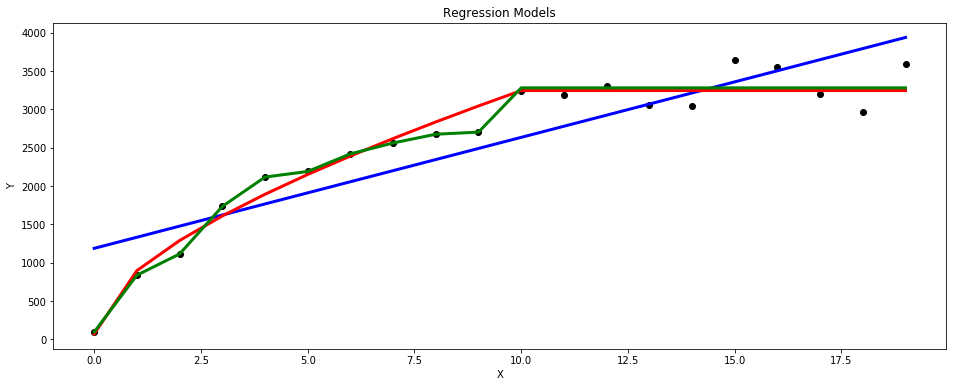

In [167]:
plt.figure(figsize=(16,6))
plt.scatter(x,y,  color='black')
plt.plot(x,y_pred, color='blue', linewidth=3)
plt.plot(x,y_poli5, color='red', linewidth=3)
plt.plot(x,y_pol15, color='green', linewidth=3)

plt.xlabel(xlabel='X')
plt.ylabel(ylabel='Y')
plt.title(label='Regression Models')
plt.show()

In [188]:
data_p['y_poli2']=y_poli5
data_p['y_poli20']=y_pol15
data_p['y_lin']=y_pred

### Training Error

**Blue**

In [199]:
def mse(y,y_pred):
    err = np.array((y-y_pred)**2)
    err = float(sum(err)/len(err))**(1/2)
    print(err)

In [200]:
mse(data_p.y,data_p.y_lin)

447.1222430741993


**Red**

In [201]:
mse(data_p.y,data_p.y_poli2)

199.55327910007213


**Green**

In [202]:
mse(data_p.y,data_p.y_poli20)

163.5717916230684


We can see that the training error is lower for the green curve.

Let's see what happens if we have another sample (test set)

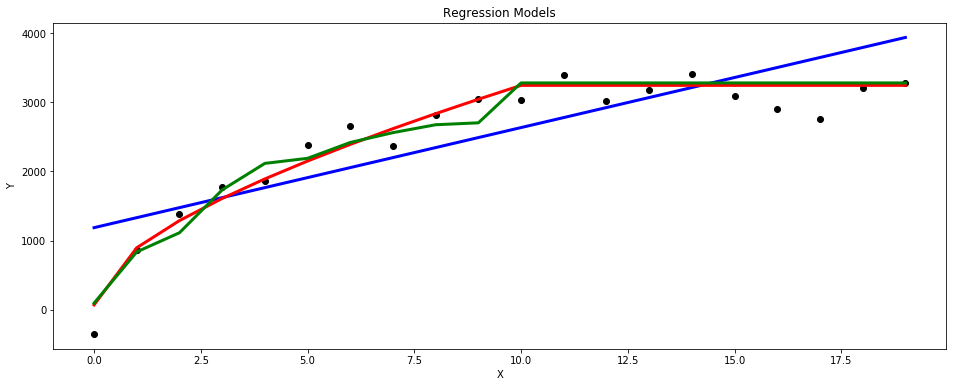

In [194]:
plt.figure(figsize=(16,6))
plt.scatter(x,data_p.y2,  color='black')
plt.plot(x,y_pred, color='blue', linewidth=3)
plt.plot(x,y_poli5, color='red', linewidth=3)
plt.plot(x,y_pol15, color='green', linewidth=3)

plt.xlabel(xlabel='X')
plt.ylabel(ylabel='Y')
plt.title(label='Regression Models')
plt.show()

### Test Errors

**Blue**

In [203]:
mse(data_p.y2,data_p.y_lin)

563.9123188926668


**Red**

In [204]:
mse(data_p.y2,data_p.y_poli2)

214.96900042674105


**Green**

In [205]:
mse(data_p.y2,data_p.y_poli20)

247.4336417800378


## Observations 

* The "best" model in training is one that *over-fits* the data, but is not the best with a test sample. The green curve learns from the noise component of the model - which really is not learning.

* The straight model is not good in training or testing. This model does not have the ability to learn from the signal in the data.

* The best model in the test sample is one that is between the straight and the green curve in terms of flexibility.

* Our intuition to choose the red model from the beginning is reflected in that it generalizes better than the others, and that in turn is reflected in a lower test error.

* Where do prediction errors come from? Can we make the error equal to zero? If we establish that the error is a growing function of $Y-\hat{Y}$, we see that $$Y-\hat{Y}=f(X)+\epsilon-\hat{f}(X)=(f(X)-\hat{f}(X))+\epsilon$$
Where we see that there are two main components that can make big $Y-\hat{Y}$:

    * The difference between $f(X)-\hat{f}(X)$ is the **reducible error**, because it depends on how well we estimate $f(X)$ with $\hat{f}(X)$
    * The random error $\epsilon$ which is the **irreducible error**.
    


* Either of these two quantities can make our predictions not accurate. We cannot do much about the irreducible error (without changing the variables we use, the definition of the problem, etc.) In our previous example, the reducible error:

    * It is big for the green model, because it responds too loud to noise in the data (it has high variance).
    * It is big for the straight line model, since it has no capacity to approach the true curve (it is biased).

## Complexity and Rigidity Tradeoff 


As we saw in the example above, training error is not a good indicator of the future performance of our predictions. To evaluate this performance, we need a test sample independent of the sample we use to learn or train the model.

Intuitively this makes sense: in the learning process we have tags available (we know the answers), so it can happen that the algorithm memorizes the association of what tags $y^{(i)}$ go with each set of entries  $x^{(i)}$. This  can happen due to the following reasons:

* The model *over-fits* the data: this means that by adjusting aspects of the training data too strongly, the algorithm seems to closely replicate the training data but performs poorly in the prediction.

* The model learns from *noise*: our learning process captures irrelevant aspects of the data, which new data will not share.

* The model has no generalization capacity, because it captures aspects that are only present in our training sample.

* The model has high variance, because it changes a lot depending on the training sample.

* The model is too complex or flexible and easily adapts to any data set, both signal and noise


In the example above, we also saw that some models may have poor performance because they do not have the ability to learn from real and general patterns in the data (the line in the previous example). We can say this in several ways:

* The model *under-adjusts* the data: they do not have the capacity to adjust aspects of the training data that are real relationships between the variables.

* The model ignores signals in the data: the algorithm does not capture relevant aspects of the data, which they share with new data and can be used to make predictions.

* The model has *no learning capacity*, as it cannot capture aspects that are general to the phenomenon of interest.

* The model has *high bias*, because it cannot adjust generalizable patterns in the data.

* The model is *too rigid*, and cannot even adapt to strong and clear patterns in the data.


We achieve good predictions when we refine our models or algorithms to learn from the signal and ignore noise, which does not help in prediction, and to reduce the prediction error as much as possible with the available data. This requires finding the right level of complexity in the models or algorithms for the data we have.

# How to estimate f?

Now we show another characteristic aspect of supervised learning. First, the most common general method to find $\hat{f}$ is the following:

   * Consider a family of $h$ functions to approximate $f$
   * Calculate the traininng error from every possible function $h$, and we find the $h$ that minimizes the training error (the one that adjusts more to the training data). We take $\hat{f}=h$.
$$\hat{f}=min_{h}\frac{1}{N}\Sigma_{i=1}^{N}(y^{(i)}-h(x^{(i)}))^2$$

* Evaluate the test error of the model we selected (we want it to be low):

$$\hat{Err}=\frac{1}{m}\Sigma_{j=1}^{m}(y_{0}^{(j)}-\hat{f}(x_{0}^{(j)}))^{2}$$


So the process is a minimization problem. What makes our case interesting is that we really **don't want to minimize training error**. We want to **minimize the test error**. That is, we minimize an amount that really does not interest us (training error) in the hope of minimizing the amount that interests us (prediction error).

As expected, this simple scheme does not work very well in general. For the above solution to be reasonable or good, then:

* We have to be careful and be able to regulate the choice of the initial family of functions (straight? Very flexible curves? Etc.), and / or
* Sometimes we have to modify the objective of the minimization problem so that it forces us to find an adequate balance of complexity and low prediction error. For example, penalize the objective of models that are unbelievable or too complicated.
* Disturb the training sample in different ways to prevent an algorithm from learning irrelevant information


Most of the workshop will focus on considering what families we can use, what modifications of the objective function can be made, and what disturbances can be considered to improve the predictive performance of our models.

## References 

The majority of the theoretical content, if not all, was extracted from Felipe González book.

González, Felipe. Machine Learning.[Aprendizaje Supervisado](https://felipegonzalez.github.io/aprendizaje-maquina-mcd-2018/introduccion.html#aprendizaje-supervisado-1)